In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r"Iris.csv")
data.drop("Id", axis=1, inplace=True)
data.drop_duplicates(inplace=True)

In [5]:
data["Species"] = data["Species"].map({"Iris-versicolor":0, "Iris-setosa":1, "Iris-virginica":2})
data = data[data["Species"] < 2]
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [13]:
class LogisticRegression:
    '''逻辑回归'''
    
    def __init__(self, alpha, times):
        '''初始化
        
        Parameters
        ----
        alpha: float
        times:int'''
        
        self.alpha = alpha
        self.times = times
        
    def sigmoid(self, z):
        '''sigmoid实现
        
        Parameters
        -----
        z:float z = w.T * X
        '''
        return 1.0 / (1.0 + np.exp(-z))
        
    def fit(self, X, y):
        '''训练Ｘ
        
        Parameters
        ---
        X:[样本数量，样本特征]
        
        y:[样本数量]
        '''
        X = np.asarray(X)
        y = np.asarray(y)
        
        # 创建初始权重，全部设置0，多一个截距权重
        self.w_ = np.zeros(1 + X.shape[1])
        
        # 创建loss列表  （预测值 - 真实值）的平方和除以二
        self.loss_ = []
        
        # 进行循环
        for i in range(self.times):
            # 计算预测值
            z = np.dot(X, self.w_[1:]) + self.w_[0]
            p = self.sigmoid(z)
            # 计算预测值和真实值的差距
            # 逻辑回归的目标函数 J(w) = -sum(yi * log(s(zi))+ (1-yi) * log(1-s(zi)) ) 
            cost = -np.sum( y * np.log(p) + (1-y) * np.log(1-p) )
            # 将损失值加入到损失列表当中
            self.loss_.append(  cost  )
            # 调整w向梯度相反的方向: 权重(j) = 权重(j) + 学习率 * sum((y - y_hat) * x(j))
            # loss（所有数据集的error总和）对每一个w求导，即是w应该变化的方向
            # y_hat对w求导的时候，得到的是负的x(j)，由于权重 = 权重 - 权重变化率，所以负负得正，变成加号
            self.w_[0] += self.alpha * np.sum(y - p)
            self.w_[1:] += self.alpha * np.dot(X.T, y - p)
            
    def predict_proba(self, X):
            '''预测！
            
            Parameters
            -----
            X:类数组 [样本数量，特征数量]
            
            Returns
            ----
            resulet:数组,结果，概率值
            '''
            X = np.asarray(X)
            z = np.dot(X, self.w_[1:]) + self.w_[0]
            p = self.sigmoid(z)
            # 转成二维，方便拼接
            p = p.reshape(-1, 1)
            return np.concatenate([1-p, p], axis=1)
        
    def predict(self, X):
            '''预测！
            
            Parameters
            -----
            X:类数组 [样本数量，特征数量]
            
            Returns
            ----
            resulet:数组,结果，概率值
            '''
            
            return np.argmax(self.predict_proba(X), axis=1)

In [15]:
t1 = data[data["Species"] == 0]
t2 = data[data["Species"] == 1]
t1 = t1.sample(len(t1), random_state = 0)
t2 = t2.sample(len(t2), random_state = 0)

train_X = pd.concat([t1.iloc[:40, :-1], t2.iloc[:40, :-1]], axis=0)
train_y = pd.concat([t1.iloc[:40, -1], t2.iloc[:40, -1]], axis=0)
test_X = pd.concat([t1.iloc[40:, :-1], t2.iloc[40:, :-1]], axis=0)
test_y = pd.concat([t1.iloc[40:, -1], t2.iloc[40:, -1]], axis=0)

# 数值都是一个数量级，所以不需要正规化
lr = LogisticRegression(alpha=0.01, times=20)
lr.fit(train_X, train_y)

result = lr.predict(test_X)
display(result == test_y)

86    True
71    True
69    True
59    True
89    True
96    True
53    True
50    True
97    True
94    True
21    True
19    True
9     True
41    True
47    True
3     True
0     True
46    True
Name: Species, dtype: bool

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
# 设置中文显示
mpl.rcParams["font.family"] = "Droid Sans Fallback"
mpl.rcParams["axes.unicode_minus"] = False

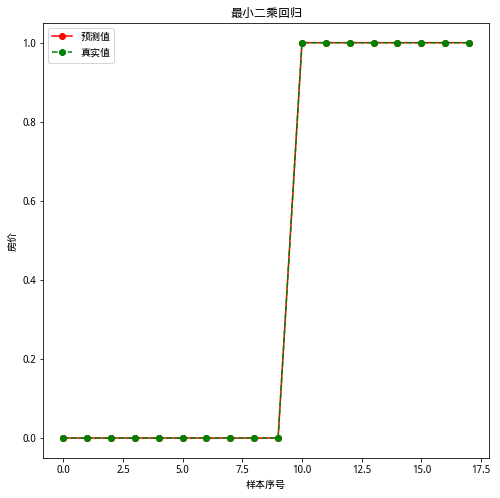

In [17]:
plt.figure(figsize=[8,8])
#绘制预测值
plt.plot(result, "ro-", label="预测值")
plt.plot(test_y.values, "go--", label="真实值")
plt.title("最小二乘回归")
plt.xlabel("样本序号")
plt.ylabel("房价")
plt.legend()
plt.show()

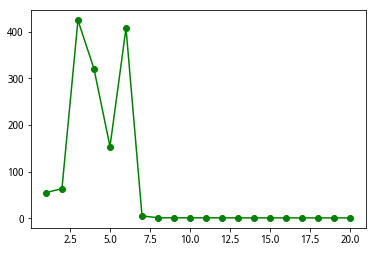

In [18]:
plt.plot(range(1, lr.times +1), lr.loss_, "go-")